In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp # https://pypi.org/project/scikit-posthocs/
import stac
import matplotlib.pyplot as plt

In [ ]:
# Assumes a formattting where rows are datasets, and the methods are columns
df = pd.read_csv("./Amazon - Accuracy.csv", index_col=0) # change source 
# df = df.drop(df.columns[-1], axis=1) # for recall, precision, f1-score files
# df = df.applymap(lambda x: float(x.split(';')[1].strip())) # for recall, precision, f1-score files
data = np.asarray(df)

Read data
Methods: 14 Datasets: 9


In [ ]:
alpha = 0.05 

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 99.0 % confidence level? False


In [ ]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

In [228]:
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args)  # Matrix for all pairwise comparisons
    pairwise_scores.columns = labels  # Label the columns
    pairwise_scores.index = labels    # Label the rows, same label as pairwise combinations
    return pairwise_scores
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)

In [229]:
nemenyi_scores

,Amazon,IMDB-Amazon,IMDB-Amazon_1,IMDB-Amazon_2,Twitter-Amazon,Twitter-Amazon_1,Twitter-Amazon_2,RT-Amazon,RT-Amazon_1,RT-Amazon_2,Spotify-Amazon,Spotify-Amazon_1,Spotify-Amazon_2,All_Amazon
Amazon,1.000000,0.999896,1.000000,0.999231,0.000030,0.000288,0.000026,0.001189,0.003926,0.006163,0.672560,0.731319,0.364077,1.000000
IMDB-Amazon,0.999896,1.000000,1.000000,1.000000,0.001718,0.010591,0.001521,0.031806,0.076920,0.105924,0.991100,0.995307,0.909893,0.998644
IMDB-Amazon_1,1.000000,1.000000,1.000000,0.999992,0.000167,0.001346,0.000146,0.004929,0.014478,0.021645,0.875360,0.909893,0.610674,0.999999
IMDB-Amazon_2,0.999231,1.000000,0.999992,1.000000,0.003499,0.019606,0.003115,0.054788,0.123376,0.164827,0.997707,0.998973,0.958413,0.994144
Twitter-Amazon,0.000030,0.001718,0.000167,0.003499,1.000000,1.000000,1.000000,0.999969,0.998973,0.997062,0.153612,0.123376,0.383171,0.000009
Twitter-Amazon_1,0.000288,0.010591,0.001346,0.019606,1.000000,1.000000,1.000000,1.000000,0.999998,0.999987,0.402684,0.345437,0.712177,0.000096
Twitter-Amazon_2,0.000026,0.001521,0.000146,0.003115,1.000000,1.000000,1.000000,0.999953,0.998644,0.996270,0.142973,0.114390,0.364077,0.000008
RT-Amazon,0.001189,0.031806,0.004929,0.054788,0.999969,1.000000,0.999953,1.000000,1.000000,1.000000,0.631550,0.568488,0.887663,0.000428
RT-Amazon_1,0.003926,0.076920,0.014478,0.123376,0.998973,0.999998,0.998644,1.000000,1.000000,1.000000,0.818363,0.768007,0.969171,0.001521
RT-Amazon_2,0.006163,0.105924,0.021645,0.164827,0.997062,0.999987,0.996270,1.000000,1.000000,1.000000,0.875360,0.833750,0.984226,0.002462


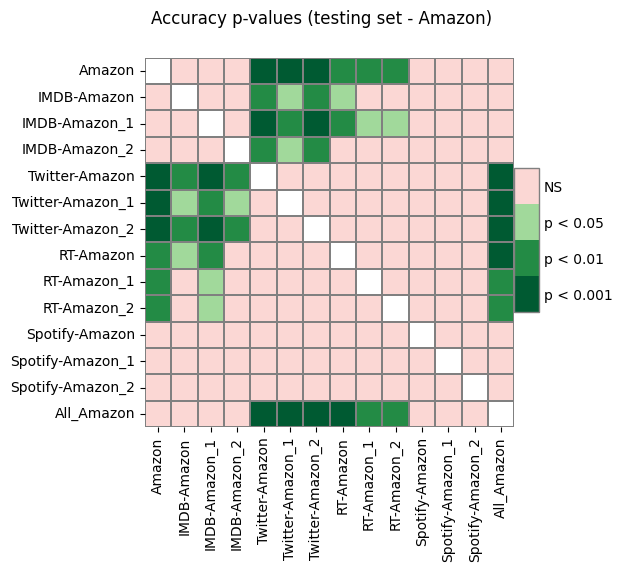

In [ ]:
plot(nemenyi_scores)
plt.suptitle("Accuracy p-values (testing set - Amazon)") #change title
plt.show()